In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime



C:\Users\flavi\AppData\Local\Temp\ipykernel_31412\1802185335.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv('../Data/Compras/dados_sinteticos_com_erros.csv')
df.head()

,id,data,hora,cliente,produto,valor_x,quantidade,total,status,cidade,...,cor,tamanho,peso,altura,largura,comprimento,categoria_y,valor_y,categoria,valor
0,1,2017-09-20,08:12:57,Filipe Cruz,Isotônico Coca-Cola,96.87,7,38.092982,em separação,Cidade,...,NaN,,83.75,12.89,35.11,56.99,bebidas,5.441855,bebidas,5.441855
1,2,2019-07-17,18:26:47,Daniel Silva,Lembrancinha Festa Box,92.21,7,123.142236,em trânsito,Cidade,...,NaN,,60.02,54.85,15.35,41.05,artigos para festas,17.591748,artigos para festas,17.591748
2,3,2018-01-20,15:55:07,Victor Silva,Convite Piffer,170.19,5,37.268889,cancelado,Cidade,...,NaN,,20.81,20.38,75.42,46.84,artigos para festas,7.453778,artigos para festas,7.453778
3,4,2016-06-21,11:36:07,Vanessa Rodrigues,Vinho Heineken,151.80,10,15.517708,entregue,Cidade,...,NaN,,44.59,4.68,32.67,91.61,bebidas,1.551771,bebidas,1.551771
4,5,2015-05-01,18:08:24,Luiz Bandeira,Chinelo Fila,82.24,7,326.226314,em separação,Cidade,...,amarelo,,92.52,57.52,33.77,49.21,calçados,46.603759,calçados,46.603759


In [ ]:
df = pd.read_csv('../Data/Dados Sujos/clientesSujos.csv')

In [124]:
df.head()

,Nome,Nascimento,Salário,Cargo
0,FILIPE COSTA,05/02/1998,3732.0,Assistente
1,VICTOR CRUZ,28/03/2002,11799.0,Assistente
2,OTÁVIO SILVA,15/07/1991,1000.0,Estagiário
3,JOÃO CRUZ,08/11/2004,4264.0,Gerente
4,GUSTAVO NETO,25/05/1994,1000.0,Estagiário


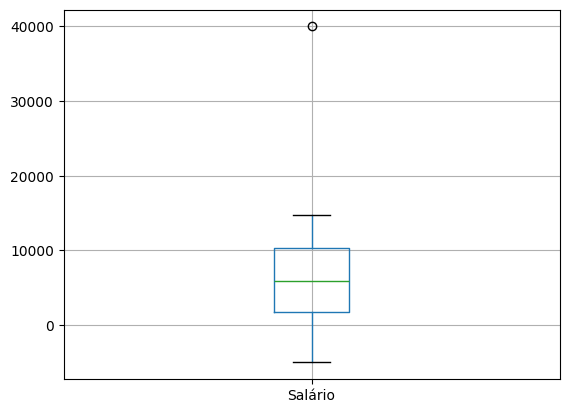

In [125]:
df.boxplot(column='Salário')
plt.show()

In [126]:
# Descobrindo valores ausentes
df.isnull().sum()

Nome          1
Nascimento    1
Salário       2
Cargo         0
dtype: int64

In [127]:
# Imprimindo as linhas com valores ausentes
print(df[df.isnull().any(axis=1)])

            Nome  Nascimento  Salário       Cargo
101          NaN  05/08/1990   1000.0  Estagiário
102  JÚLIO MASSI         NaN   1000.0  Estagiário
103  MAYCON CRUZ  21/04/1999      NaN  Estagiário
104  FILIPE CRUZ  01/08/2001      NaN     Gerente


In [128]:
grouped_df = df.groupby('Cargo').apply(lambda x: x.select_dtypes(include=['number']).mean())
print(grouped_df)

                 Salário
Cargo                   
Analista     6332.466667
Asistente    1000.000000
Assistente   8978.150000
Direto      40000.000000
Diretor      6928.000000
Estagiário   1000.000000
Gerente      7484.724138


C:\Users\flavi\AppData\Local\Temp\ipykernel_8664\4001277629.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped_df = df.groupby('Cargo').apply(lambda x: x.select_dtypes(include=['number']).mean())


In [129]:
grouped_df = df.groupby('Cargo').apply(lambda x: x.select_dtypes(include=['number']).median())
print(grouped_df)

            Salário
Cargo              
Analista     5420.0
Asistente    1000.0
Assistente   9479.0
Direto      40000.0
Diretor      7172.0
Estagiário   1000.0
Gerente      6874.0


C:\Users\flavi\AppData\Local\Temp\ipykernel_8664\2121088414.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped_df = df.groupby('Cargo').apply(lambda x: x.select_dtypes(include=['number']).median())


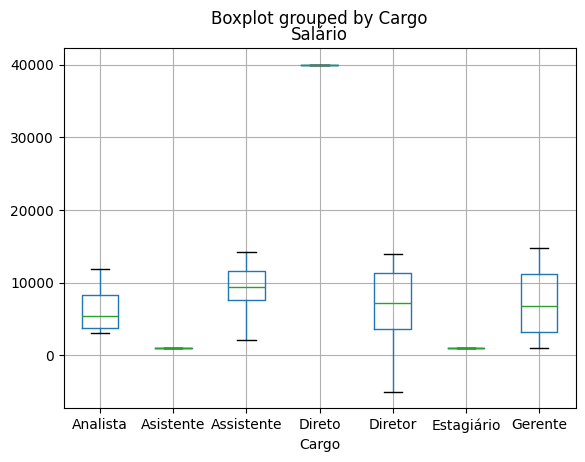

In [130]:
# Boxplot de salários por cargo
df.boxplot(column='Salário', by='Cargo')
plt.show()

In [131]:
# Preenchendo valores ausentes com a média dos salários dos cargos
df['Salário'] = df['Salário'].fillna(df.groupby('Cargo')['Salário'].transform('mean'))

In [132]:
# Imprimindo as linhas com valores ausentes
print(df[102:105])

            Nome  Nascimento      Salário       Cargo
102  JÚLIO MASSI         NaN  1000.000000  Estagiário
103  MAYCON CRUZ  21/04/1999  1000.000000  Estagiário
104  FILIPE CRUZ  01/08/2001  7484.724138     Gerente


In [133]:
# Imprimindo quantidades de duplicados
print(df.duplicated().sum())
# Identificando duplicados
print(df[df.duplicated()])
# Imprimindo as linhas duplicadas
print(df[df.duplicated(keep=False)])


1
               Nome  Nascimento  Salário     Cargo
100  JÚLIO OLIVEIRA  25/01/1990  11959.0  Analista
               Nome  Nascimento  Salário     Cargo
99   JÚLIO OLIVEIRA  25/01/1990  11959.0  Analista
100  JÚLIO OLIVEIRA  25/01/1990  11959.0  Analista


In [134]:
# Removendo duplicados
df = df.drop_duplicates()

In [135]:
#Identificando erros de digitação
print(df['Cargo'].unique())


['Assistente' 'Estagiário' 'Gerente' 'Diretor' 'Analista' 'Asistente'
 'Direto']


In [136]:
#Substituindo valores 'Direto' por 'Diretor' e "Asistente" por "Assistente"
# df['Cargo'] = df['Cargo'].str.replace('Direto','Diretor')

# Cuidado, a ocorrencia de 'Direto' tem que ser exata
df['Cargo'] = df['Cargo'].str.replace(r'\bDireto\b','Diretor')
df['Cargo'] = df['Cargo'].str.replace('Asistente','Assistente')
print(df['Cargo'].unique())

['Assistente' 'Estagiário' 'Gerente' 'Diretor' 'Analista' 'Direto']


In [137]:
df_datas = pd.DataFrame()
df_datas['data'] = df['Nascimento']
df_datas.head()

,data
0,05/02/1998
1,28/03/2002
2,15/07/1991
3,08/11/2004
4,25/05/1994


In [138]:
df_datas['data'] = pd.to_datetime(df_datas['data'], errors='coerce')
df_datas['cargo'] = df['Cargo']

# Identificar as linhas onde a conversão resultou em NaT (entradas inválidas ou formatos inesperados)
linhas_com_erro = df_datas[df_datas['data'].isna()]

if not linhas_com_erro.empty:
    print("Linhas com datas não convertíveis para datetime:")
    print(linhas_com_erro)

# Para as linhas válidas, extração de dia, mês e ano, e cálculo da idade
df_datas.dropna(subset=['data'], inplace=True)  # Opcional: remover linhas com NaT se desejar
df_datas['dia'] = df_datas['data'].dt.day
df_datas['mes'] = df_datas['data'].dt.month
df_datas['ano'] = df_datas['data'].dt.year
df_datas['idade'] = 2024 - df_datas['ano']

df_datas.head()


Linhas com datas não convertíveis para datetime:
    data       cargo
1    NaT  Assistente
2    NaT  Estagiário
4    NaT  Estagiário
6    NaT  Assistente
7    NaT     Diretor
..   ...         ...
99   NaT    Analista
102  NaT  Estagiário
103  NaT  Estagiário
107  NaT      Direto
108  NaT     Diretor

[66 rows x 2 columns]


,data,cargo,dia,mes,ano,idade
0,1998-05-02,Assistente,2,5,1998,26
3,2004-08-11,Gerente,11,8,2004,20
5,1994-12-01,Diretor,1,12,1994,30
10,1995-09-05,Analista,5,9,1995,29
12,1996-01-09,Diretor,9,1,1996,28


In [139]:
df[101:108]

,Nome,Nascimento,Salário,Cargo
102,JÚLIO MASSI,NaN,1000.000000,Estagiário
103,MAYCON CRUZ,21/04/1999,1000.000000,Estagiário
104,FILIPE CRUZ,01/08/2001,7484.724138,Gerente
105,PEDRO NÁPOLES,05/13/1990,1000.000000,Gerente
106,OTÁVIO SOARES,05/11/1790,1000.000000,Assistente
107,VICTOR RODRIGUES,05/11/2990,40000.000000,Direto
108,VANESSA OLIVEIRA,105/11/1990,-5000.000000,Diretor


In [140]:
#imprimir a média de idade por cargo
print(df_datas.groupby('cargo')['idade'].median())

cargo
Analista      25.0
Assistente    28.0
Diretor       30.0
Estagiário    21.0
Gerente       28.5
Name: idade, dtype: float64


In [141]:
df_datas.boxplot(column='idade')

<Axes: >

In [142]:
#Identificando onde está o outlier
print(df_datas[df_datas['idade'] > 100])

          data       cargo  dia  mes   ano  idade
106 1790-05-11  Assistente   11    5  1790    234


In [143]:
# 102,106,107,108 São linhas com erros de data, podemos preencher com a mediana por cargo
media_diretor = 29
media_assistente = 27
media_estagiario = 28
nascimento_diretor = '01/01/1995'
nascimento_assistente = '01/01/1997'
nascimento_estagiario = '01/01/1996'
df.loc[102, 'Nascimento'] = nascimento_estagiario
df.loc[106, 'Nascimento'] = nascimento_assistente
df.loc[107, 'Nascimento'] = nascimento_diretor
df.loc[108, 'Nascimento'] = nascimento_diretor

df[101:108]

,Nome,Nascimento,Salário,Cargo
102,JÚLIO MASSI,01/01/1996,1000.000000,Estagiário
103,MAYCON CRUZ,21/04/1999,1000.000000,Estagiário
104,FILIPE CRUZ,01/08/2001,7484.724138,Gerente
105,PEDRO NÁPOLES,05/13/1990,1000.000000,Gerente
106,OTÁVIO SOARES,01/01/1997,1000.000000,Assistente
107,VICTOR RODRIGUES,01/01/1995,40000.000000,Direto
108,VANESSA OLIVEIRA,01/01/1995,-5000.000000,Diretor


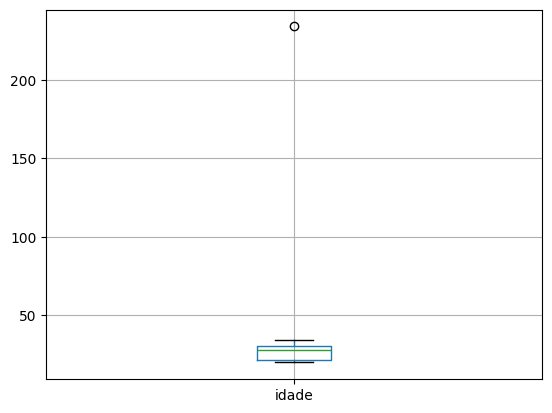

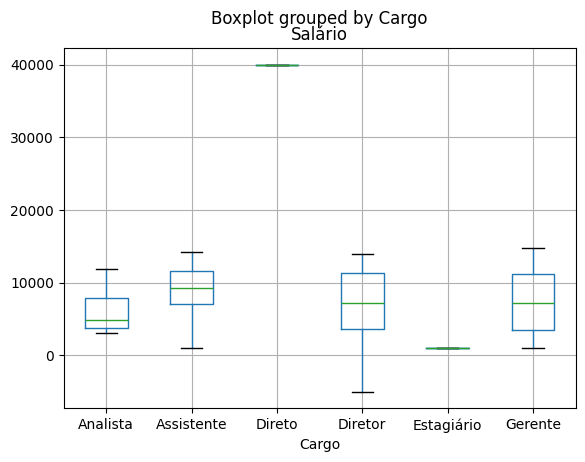

In [144]:
df.boxplot(column='Salário', by='Cargo')
plt.show()

In [145]:
#Identificando salário negativo
print(df[df['Salário'] < 0])

                 Nome  Nascimento  Salário    Cargo
108  VANESSA OLIVEIRA  01/01/1995  -5000.0  Diretor


In [146]:
# 109 é um erro de digitação, vamos preencher com a mediana do cargo
# Mediana de salários por cargo
mediana_Diretor = df.groupby('Cargo').median().at['Diretor', 'Salário']
df.loc[108, 'Salário'] = mediana_Diretor

TypeError: agg function failed [how->median,dtype->object]

In [ ]:
df.tail()

,Nome,Nascimento,Salário,Cargo
104,PEDRO NÁPOLES,05/13/1990,1000.0,Gerente
105,OTÁVIO SOARES,01/01/1997,1000.0,Assistente
106,VICTOR RODRIGUES,01/01/1997,40000.0,Diretor
107,VANESSA OLIVEIRA,01/01/1995,7194.0,Diretor
108,NaN,01/01/1995,7205.0,NaN


In [ ]:
# Salvando o dataframe limpo
df.to_csv('../Data/Dados Sujos/clientesLimpos.csv', index=False)

In [ ]:
# Transformando cargos em numéricos
df['Cargo'] = df['Cargo'].astype('category').cat.codes
df.head()

,Nome,Nascimento,Salário,Cargo
0,FILIPE COSTA,05/02/1998,3732.0,1
1,VICTOR CRUZ,28/03/2002,11799.0,1
2,OTÁVIO SILVA,15/07/1991,1000.0,3
3,JOÃO CRUZ,08/11/2004,4264.0,4
4,GUSTAVO NETO,25/05/1994,1000.0,3
